In [42]:
#importing the library
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [43]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [45]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


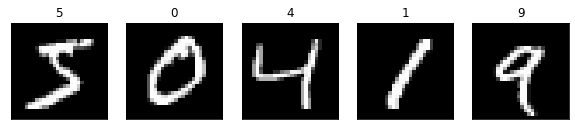

In [46]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [47]:
# Add a dummy channel dimension

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [52]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [48]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

In [50]:
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [51]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [53]:
# Create simple Neural Network model
model = Sequential()
model.add(Conv2D(8, (3,3),padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation='softmax'))

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
________________________________________________

In [55]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [56]:
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5260 - acc: 0.8197 - val_loss: 0.1563 - val_acc: 0.9530
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1195 - acc: 0.9646 - val_loss: 0.1065 - val_acc: 0.9692
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0805 - acc: 0.9768 - val_loss: 0.1054 - val_acc: 0.9701
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0609 - acc: 0.9807 - val_loss: 0.0866 - val_acc: 0.9756
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0579 - acc: 0.9816 - val_loss: 0.0833 - val_acc: 0.9766


In [57]:
predictions = model.predict(X_test)
print(predictions)

[[3.5118575e-08 1.2123699e-06 2.6355906e-06 ... 9.9999607e-01
  5.8395138e-09 5.9091487e-09]
 [2.2212358e-13 6.2851439e-07 9.9999940e-01 ... 4.7823040e-10
  4.4533244e-13 5.7937185e-15]
 [7.6517523e-08 9.9999988e-01 2.1705625e-11 ... 5.0095537e-08
  5.3389520e-08 3.9807691e-08]
 ...
 [1.4150106e-09 5.0427402e-06 5.7534697e-09 ... 2.3066857e-06
  7.6178039e-06 1.9069009e-04]
 [1.2678684e-07 3.8756533e-13 1.7614682e-13 ... 1.7041812e-11
  1.6649200e-07 6.8901590e-10]
 [2.1648722e-05 4.9516353e-14 2.6390281e-11 ... 1.6158477e-11
  1.9863879e-09 2.4599092e-12]]


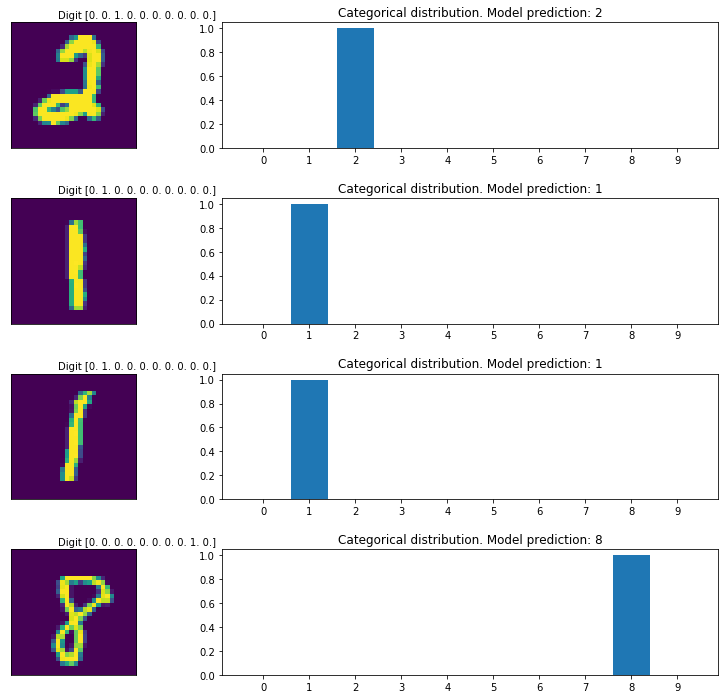

In [60]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_inx]
random_test_labels = y_test[random_inx]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()
